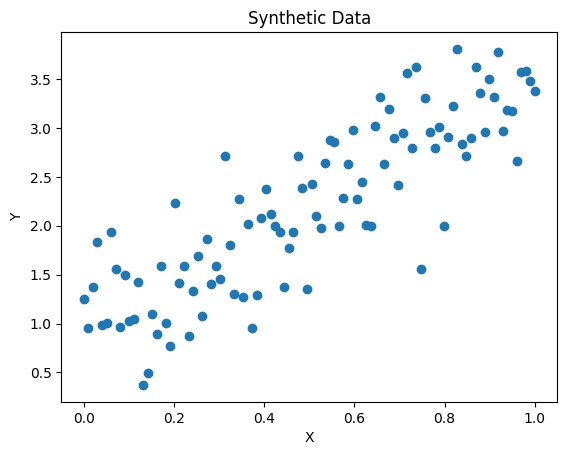

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 112 seconds.


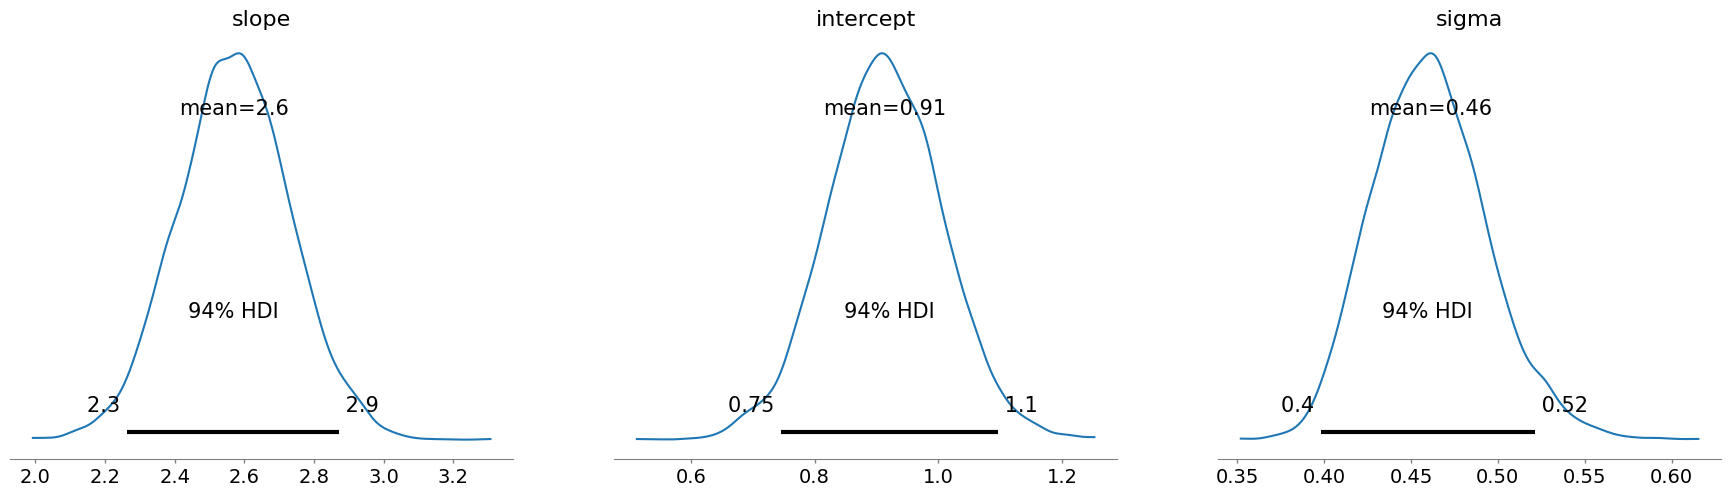

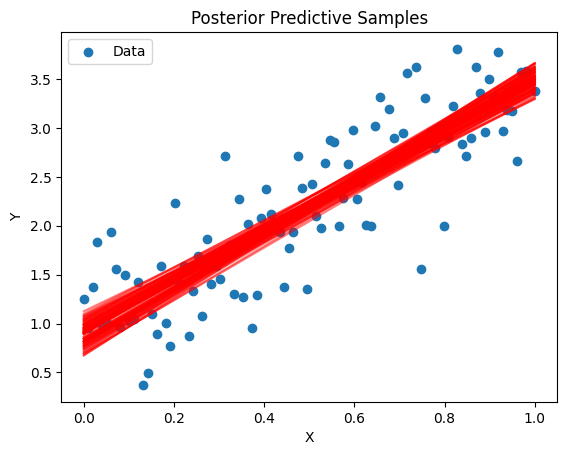

In [3]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
np.random.seed(42)
n = 100
X = np.linspace(0, 1, n)
true_slope = 2.5
true_intercept = 1.0
Y = true_slope * X + true_intercept + np.random.normal(scale=0.5, size=n)

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Plot the data
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data')
plt.show()

# Define the Bayesian linear regression model
with pm.Model() as model:
    # Priors for unknown model parameters
    slope = pm.Normal('slope', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Expected value of the outcome
    mu = slope * data['X'] + intercept
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=data['Y'])
    
    # Perform MCMC sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot the posterior distributions
az.plot_posterior(trace)
plt.show()

# Extract the posterior samples
slope_samples = trace.posterior['slope'].values.flatten()
intercept_samples = trace.posterior['intercept'].values.flatten()

# Make predictions using the posterior samples
X_new = np.linspace(0, 1, 100)
Y_pred_samples = np.outer(slope_samples, X_new) + intercept_samples[:, None]

# Plot the predictions
plt.scatter(data['X'], data['Y'], label='Data')
for i in range(100):
    plt.plot(X_new, Y_pred_samples[i], color='red', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Posterior Predictive Samples')
plt.legend()
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data for demonstration
np.random.seed(42)
n = 100
X = np.linspace(0, 1, n).reshape(-1, 1)
true_slope = 2.5
true_intercept = 1.0
Y = true_slope * X.flatten() + true_intercept + np.random.normal(scale=0.5, size=n)

# Create a DataFrame
data = pd.DataFrame({'X': X.flatten(), 'Y': Y})

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

# Evaluate models
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print(f"Linear Regression - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

# Select the best model based on R²
if r2_rf > r2_lr:
    best_model = rf_model
    print("Selected Model: Random Forest")
else:
    best_model = lr_model
    print("Selected Model: Linear Regression")

Linear Regression - MSE: 0.1555, R²: 0.7837
Random Forest - MSE: 0.2686, R²: 0.6263
Selected Model: Linear Regression


Les modèles de changement de régime, également connus sous le nom de modèles de Markov Switching, sont des modèles statistiques qui permettent de capturer les dynamiques des séries temporelles qui changent de comportement à différents moments. Ces modèles sont particulièrement utiles pour modéliser les séries temporelles financières, où les marchés peuvent alterner entre des régimes de tendance haussière, baissière et de consolidation.

Concepts Clés des Modèles de Changement de Régime
Régimes :

Un régime est un état distinct dans lequel une série temporelle peut se trouver. Par exemple, un marché peut être dans un régime haussier, baissier ou neutre.
Probabilités de Transition :

Les probabilités de transition déterminent la probabilité de passer d'un régime à un autre. Ces probabilités sont souvent modélisées par une matrice de transition de Markov.
Modélisation des Régimes :

Chaque régime peut avoir ses propres paramètres de modèle. Par exemple, dans un modèle de régression, chaque régime peut avoir une pente et une intercept différentes.
Échantillonnage MCMC :

Les algorithmes MCMC peuvent être utilisés pour estimer les paramètres du modèle et les probabilités de transition entre les régimes.

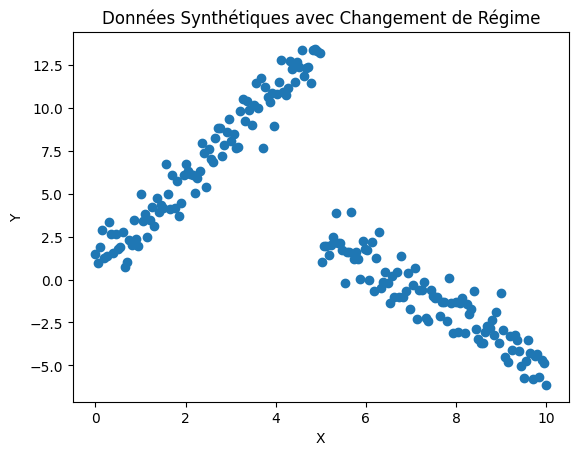

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [intercept1, slope1, intercept2, slope2, sigma]
>Metropolis: [switchpoint]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1074 seconds.
C:\Users\BenjaminMoiroud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\arviz\stats\diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


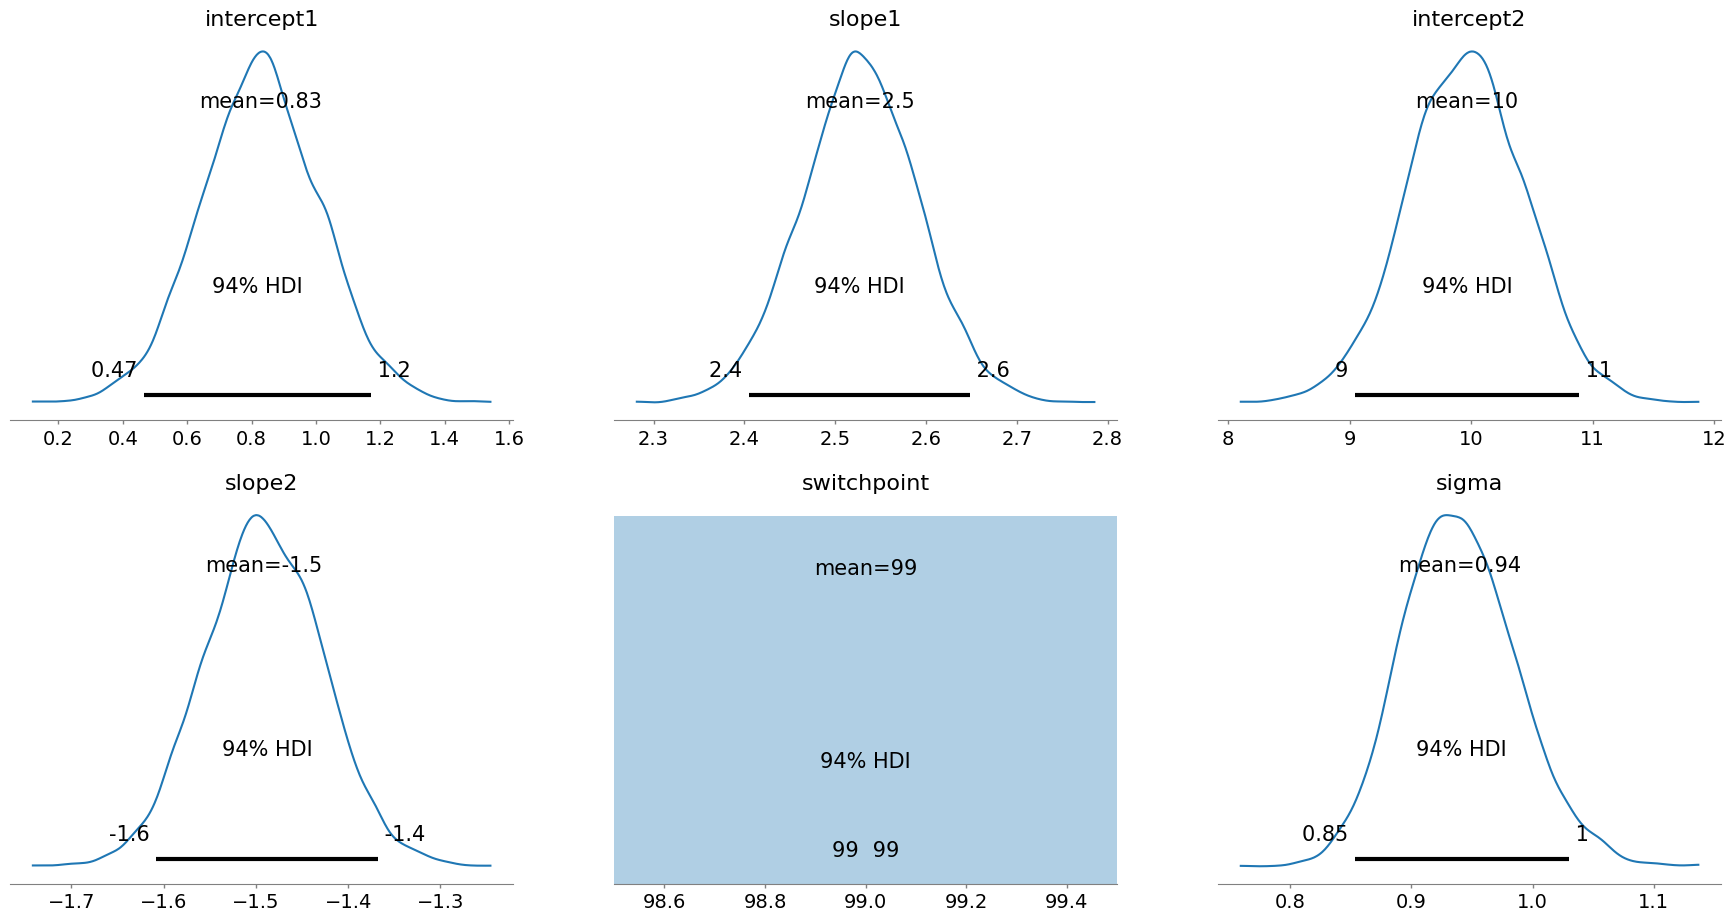

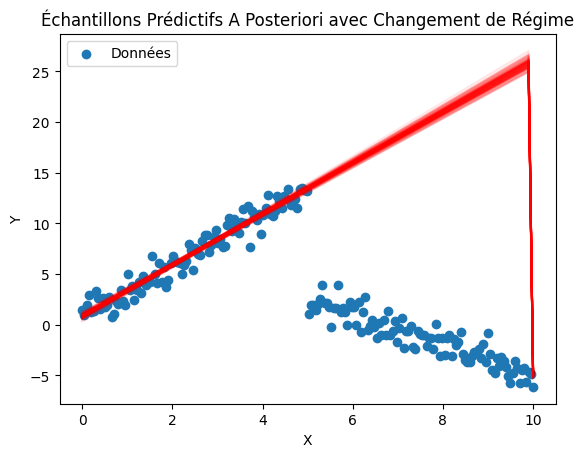

In [5]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Générer des données synthétiques pour la démonstration
np.random.seed(42)
n = 200
X = np.linspace(0, 10, n)
true_slope1 = 2.5
true_intercept1 = 1.0
true_slope2 = -1.5
true_intercept2 = 10.0
Y = np.piecewise(X, [X < 5, X >= 5], [lambda x: true_slope1 * x + true_intercept1, lambda x: true_slope2 * x + true_intercept2])
Y += np.random.normal(scale=1.0, size=n)

# Créer un DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Tracer les données
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Données Synthétiques avec Changement de Régime')
plt.show()

# Définir le modèle de changement de régime
with pm.Model() as model:
    # Priors pour les paramètres des régimes
    intercept1 = pm.Normal('intercept1', mu=0, sigma=10)
    slope1 = pm.Normal('slope1', mu=0, sigma=10)
    intercept2 = pm.Normal('intercept2', mu=0, sigma=10)
    slope2 = pm.Normal('slope2', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Variable latente pour les régimes
    switchpoint = pm.DiscreteUniform('switchpoint', lower=0, upper=n)
    
    # Modèle de régression avec changement de régime
    mu = pm.math.switch(switchpoint >= np.arange(n), slope1 * data['X'] + intercept1, slope2 * data['X'] + intercept2)
    
    # Vraisemblance (distribution d'échantillonnage) des observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=data['Y'])
    
    # Effectuer l'échantillonnage MCMC
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Tracer les distributions a posteriori
az.plot_posterior(trace)
plt.show()

# Extraire les échantillons a posteriori
switchpoint_samples = trace.posterior['switchpoint'].values.flatten()
intercept1_samples = trace.posterior['intercept1'].values.flatten()
slope1_samples = trace.posterior['slope1'].values.flatten()
intercept2_samples = trace.posterior['intercept2'].values.flatten()
slope2_samples = trace.posterior['slope2'].values.flatten()

# Faire des prédictions en utilisant les échantillons a posteriori
X_new = np.linspace(0, 10, 100)
Y_pred_samples = np.zeros((len(switchpoint_samples), len(X_new)))
for i, sp in enumerate(switchpoint_samples):
    Y_pred_samples[i, :sp] = slope1_samples[i] * X_new[:sp] + intercept1_samples[i]
    Y_pred_samples[i, sp:] = slope2_samples[i] * X_new[sp:] + intercept2_samples[i]

# Tracer les prédictions
plt.scatter(data['X'], data['Y'], label='Données')
for i in range(100):
    plt.plot(X_new, Y_pred_samples[i], color='red', alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Échantillons Prédictifs A Posteriori avec Changement de Régime')
plt.legend()
plt.show()

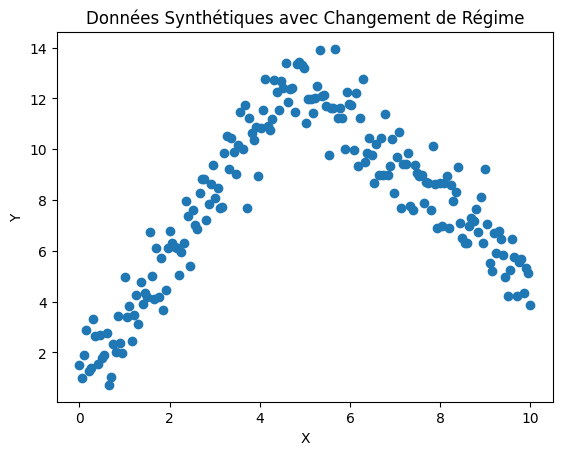

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [intercept1, slope1, intercept2, slope2, sigma]
>Metropolis: [switchpoint]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 962 seconds.


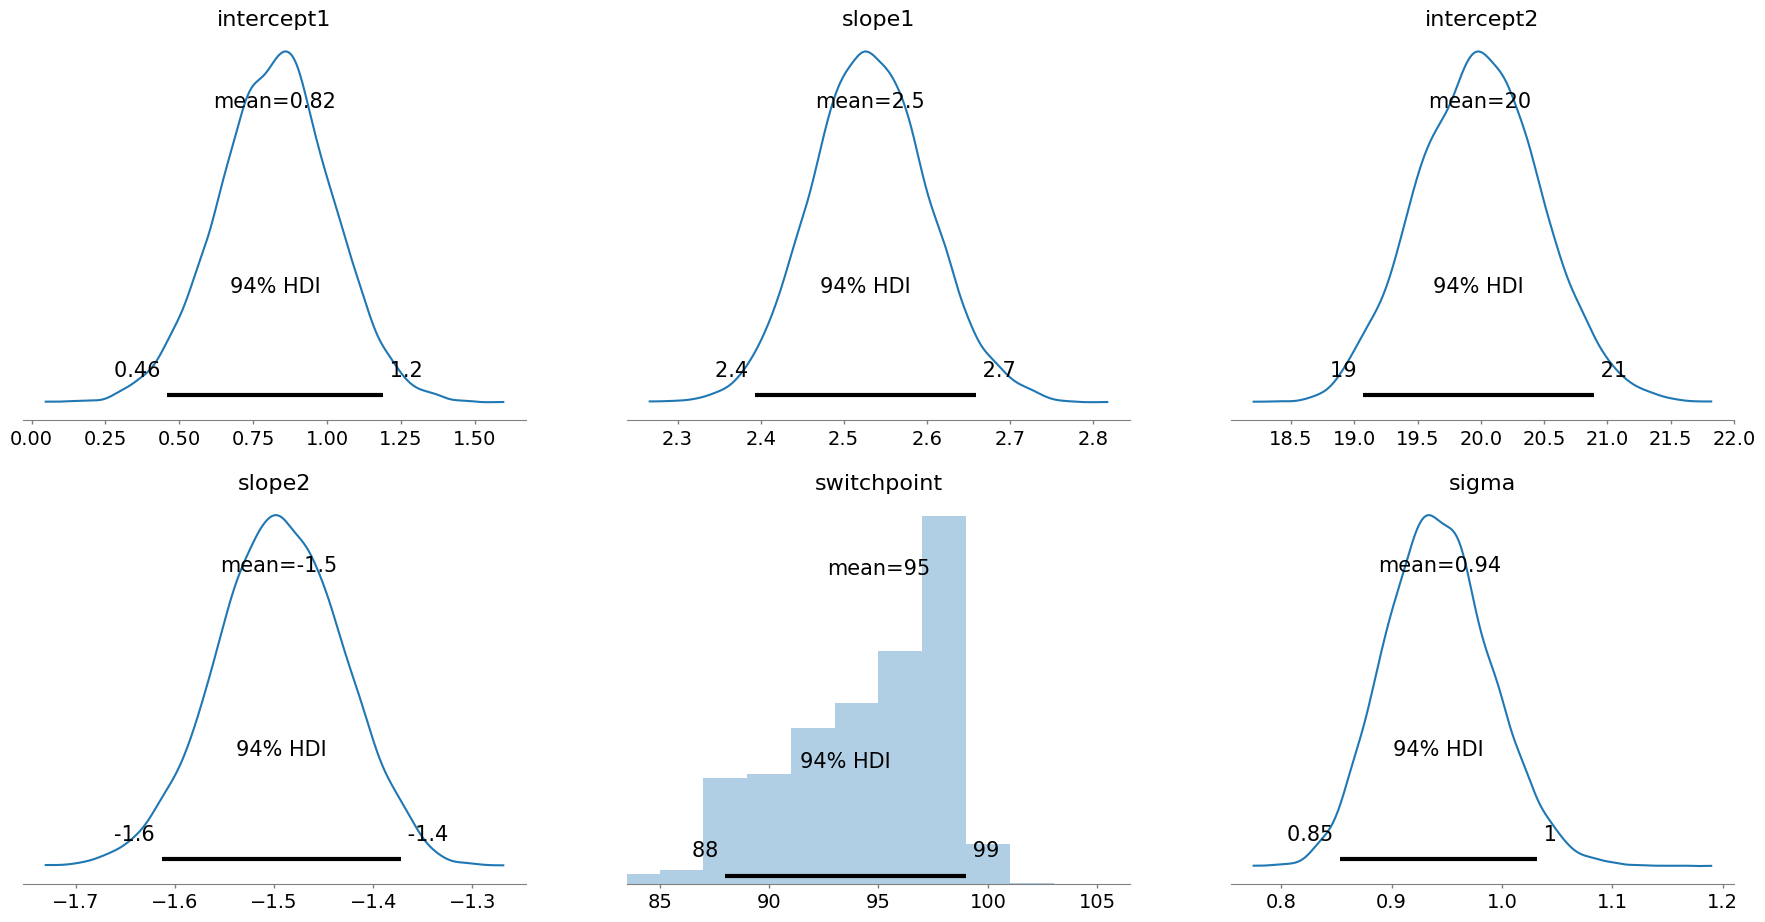

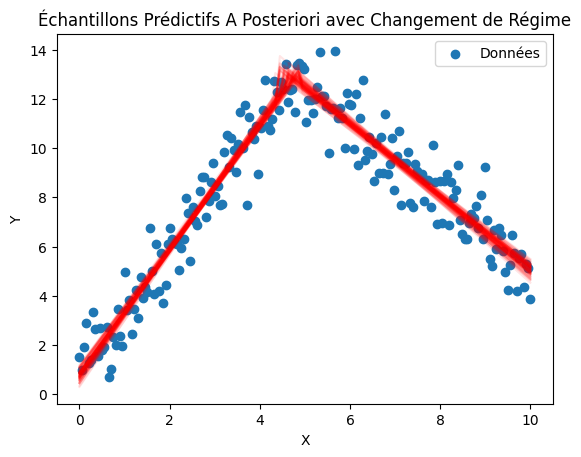

In [7]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Générer des données synthétiques pour la démonstration
np.random.seed(42)
n = 200
X = np.linspace(0, 10, n)
true_slope1 = 2.5
true_intercept1 = 1.0
true_slope2 = -1.5
true_intercept2 = 20.0
Y = np.piecewise(X, [X < 5, X >= 5], [lambda x: true_slope1 * x + true_intercept1, lambda x: true_slope2 * x + true_intercept2])
Y += np.random.normal(scale=1.0, size=n)

# Créer un DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Tracer les données
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Données Synthétiques avec Changement de Régime')
plt.show()

# Définir le modèle de changement de régime
with pm.Model() as model:
    # Priors pour les paramètres des régimes
    intercept1 = pm.Normal('intercept1', mu=0, sigma=10)
    slope1 = pm.Normal('slope1', mu=0, sigma=10)
    intercept2 = pm.Normal('intercept2', mu=0, sigma=10)
    slope2 = pm.Normal('slope2', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Variable latente pour les régimes
    switchpoint = pm.DiscreteUniform('switchpoint', lower=0, upper=n)
    
    # Modèle de régression avec changement de régime
    mu = pm.math.switch(switchpoint >= np.arange(n), slope1 * data['X'] + intercept1, slope2 * data['X'] + intercept2)
    
    # Vraisemblance (distribution d'échantillonnage) des observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=data['Y'])
    
    # Effectuer l'échantillonnage MCMC
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Tracer les distributions a posteriori
az.plot_posterior(trace)
plt.show()

# Extraire les échantillons a posteriori
switchpoint_samples = trace.posterior['switchpoint'].values.flatten()
intercept1_samples = trace.posterior['intercept1'].values.flatten()
slope1_samples = trace.posterior['slope1'].values.flatten()
intercept2_samples = trace.posterior['intercept2'].values.flatten()
slope2_samples = trace.posterior['slope2'].values.flatten()

# Faire des prédictions en utilisant les échantillons a posteriori
X_new = np.linspace(0, 10, 100)
Y_pred_samples = np.zeros((len(switchpoint_samples), len(X_new)))
for i, sp in enumerate(switchpoint_samples):
    sp = int(sp * len(X_new) / n)  # Ajuster le point de changement pour les nouvelles données
    Y_pred_samples[i, :sp] = slope1_samples[i] * X_new[:sp] + intercept1_samples[i]
    Y_pred_samples[i, sp:] = slope2_samples[i] * X_new[sp:] + intercept2_samples[i]

# Tracer les prédictions
plt.scatter(data['X'], data['Y'], label='Données')
for i in range(100):
    plt.plot(X_new, Y_pred_samples[i], color='red', alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Échantillons Prédictifs A Posteriori avec Changement de Régime')
plt.legend()
plt.show()